In [1]:
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
# pour afficher toutes les colonnes:
pd.options.display.max_columns = None

# Données sur la cantine centrale

#### La cantine centrale

In [3]:
# prévision = prévision des repas
# réel = nombre de repas servit
# effectif = élèves totaux des établissements (chiffre annuel)
# nos = non organisation syndicale (plus transports)
# ind = grèves de l'educ nationale
cantine = pd.read_csv("Global_clean.csv", sep=',')

# transformation des formats de la colonne date en datetime
cantine['date'] = pd.to_datetime(cantine['date'], format="%Y/%m/%d")

cantine = cantine.drop(['Unnamed: 0'], axis=1)

In [35]:
cantine.head()

,date,prevision,reel,effectif,nos,ind,greves_manquantes,menu,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,inc_grippe,inc_gastro,inc_varicelle,fete_musulmane,ramadan,fete_chretienne,fete_juive,jour,semaine,mois,gaspillage_volume,gaspillage_pourcentage,greves
0,2011-01-03,12289,11129,17373,1.0,0,0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,0,0,0,1,0,10505,6554,551,0,0,0,0,Lundi,1,Janvier,1160,9.439336,1.0
1,2011-01-04,12558,11808,17373,0.0,0,0,"['Crêpe au fromage', 'emincé de volaille à la ...",0,0,0,0,0,0,10505,6554,551,0,0,0,0,Mardi,1,Janvier,750,5.972289,0.0
2,2011-01-06,12753,11741,17373,0.0,0,0,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",0,0,0,0,0,0,10505,6554,551,0,0,1,0,Jeudi,1,Janvier,1012,7.935388,0.0
3,2011-01-07,12812,12322,17373,0.0,0,0,"['Choux blancs mimolette', 'milanette en des',...",0,0,0,0,0,0,10505,6554,551,0,0,1,0,Vendredi,1,Janvier,490,3.824539,0.0
4,2011-01-10,12309,11302,17373,0.0,0,0,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,0,0,0,0,7200,6453,493,0,0,0,0,Lundi,2,Janvier,1007,8.181006,0.0


#### Nombre sur les manquants 

In [4]:
# Fonction pour mettre en évidence les NaNs et leur donner un pourcentage 
def missing_values_table(cantine):
        mis_val = cantine.isnull().sum()
        mis_val_percent = 100 * cantine.isnull().sum() / len(cantine)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(cantine.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(cantine)

Your selected dataframe has 27 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
gaspillage_pourcentage,32,2.7


# Données sur les établissements scolaires

#### Les établissements scolaires

In [5]:
school = pd.read_csv("school_clean.csv", parse_dates = True)

# transformation des formats de la colonne date en datetime
school['date'] = pd.to_datetime(school['date'], format="%Y/%m/%d")

school = school.drop(['Unnamed: 0'], axis=1)

In [6]:
school.head()

,greves,greves_manquantes,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,jour,semaine,mois,repas_noel,porc,viande,poisson,bio,date,prevision,reel,site_nom,site_type,ecole_list,annee_scolaire,effectif_list,effectif,prix_moyen_m2_appartement,Quartier_detail,prix_Quartier_detail_m2_appart,Nom du pôle,Longitude_Latitude,equipe_ordi,orga_zone,cadre_proxi,resp_site,aer,atr,concierge,Code établissement
0,0,0,0,0,0,0,1,0,0,0,0,0,Lundi,1,Janvier,0,0,1,0,0,2011-01-03,131.0,122.0,CHENE D'ARON,E,"[""CHENE D'ARON ELEMENTAIRE""]",2010-2011,[145],145.0,4430,Centre ville,4200,Nantes-Loire,"[-1.56090982193118,47.2122056379041]",0.0,OUEST,Estelle Bouchet Menet,0.0,2.0,1.0,1.0,0440627T
1,0,0,0,0,0,0,1,0,0,0,0,0,Lundi,1,Janvier,0,0,1,0,0,2011-01-03,73.0,58.0,CHENE D'ARON,M,"[""CHENE D'ARON MATERNELLE""]",2010-2011,[78],78.0,4240,Centre ville,4200,Nantes-Loire,"[-1.56031985366696,47.2120061437076]",0.0,OUEST,Estelle Bouchet Menet,0.0,1.0,0.0,0.0,0440700X
2,0,0,0,0,0,0,1,0,0,0,0,0,Lundi,1,Janvier,0,0,1,0,0,2011-01-03,49.0,49.0,COTE D'OR,M,"[""COTE D'OR MATERNELLE""]",2010-2011,[66],66.0,3089,Nantes Nord,3143,Erdre et Cens,"[-1.57259938808227,47.2472636471014]",0.0,NORD,Eric Freuchet,0.0,0.0,1.0,0.0,0442048M
3,0,0,0,0,0,0,1,0,0,0,0,0,Lundi,1,Janvier,0,0,1,0,0,2011-01-03,265.0,241.0,AGENETS,M/E,"['AGENETS ELEMENTAIRE', 'AGENETS MATERNELLE']",2010-2011,"[166, 129]",295.0,3031,Saint Donatien,3397,Nantes-Loire,"[-1.53043977895119,47.2276390419726]",0.0,SUD,Olivier Geneste,1.0,5.0,0.0,1.0,0440612B
4,0,0,0,0,0,0,1,0,0,0,0,0,Lundi,1,Janvier,0,0,1,0,0,2011-01-03,57.0,53.0,ALAIN FOURNIER,M,['ALAIN FOURNIER MATERNELLE'],2010-2011,[114],114.0,2908,Bellevue,2414,Nantes-Ouest,"[-1.60177038499681,47.2041450203042]",0.0,OUEST,Florence Chérault,0.0,1.0,1.0,0.0,NaN


#### Nombre de manquants pour les établissement scolaires

In [7]:
# Fonction pour mettre en évidence les NaNs et leur donner un pourcentage 
def missing_values_table(school):
        mis_val = school.isnull().sum()
        mis_val_percent = 100 * school.isnull().sum() / len(school)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(school.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(school)

Your selected dataframe has 42 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
Code établissement,3449,3.3
prevision,3016,2.9
reel,3003,2.9
equipe_ordi,570,0.5
orga_zone,570,0.5
cadre_proxi,570,0.5
resp_site,570,0.5
aer,570,0.5
atr,570,0.5
concierge,570,0.5


# Données sur les grèves depuis 2002

#### Import des données sur les grèves depuis 2002 depuis le site: https://ressources.data.sncf.com/explore/dataset/mouvements-sociaux-depuis-2002/export/?sort=date_de_debut

In [8]:
greve = pd.read_csv("greves_clean.csv", parse_dates = True)

greve = greve.drop(['Unnamed: 0'], axis=1)

In [9]:
greve.head()

,date_de_debut,date_de_fin,Motif exprimé,Organisations syndicales,Métiers ciblés par le préavis,Population devant travailler ciblee par le préavis,Nombre de grévistes du préavis,Taux de grévistes au sein de la population concernée par le préavis
0,2003-02-10,2003-02-12,Journée d'action des agents du Matériel : moye...,CGT;CFDT;CFTC,agent de manoeuvre;logistique;ingénierie et ma...,3935.0,694.0,17.6
1,2003-05-12,NaN,Retraites.,SUD;FO,conducteur;agent de manoeuvre;chef de bord;acc...,50410.0,11867.0,23.5
2,2004-06-18,2004-06-21,Transformer la réunion du 6 juillet en table-r...,SUD,conducteur,5487.0,54.0,1.0
3,2004-07-06,2004-07-06,Mouvement irrégulier. Agression d'un chef de b...,SUD,chef de bord,4531.0,569.0,12.6
4,2004-11-09,2004-11-09,Projet de Performance Logistique et Industriel...,CGT;UNSA;SUD;FO,ingénierie et maintenance du matériel roulant,1888.0,163.0,8.6


In [26]:
# transformation des formats des colonnes date en datetime
greve['date_de_debut'] = pd.to_datetime(greve['date_de_debut'], format="%Y/%m/%d")
greve['date_de_fin'] = pd.to_datetime(greve['date_de_fin'], format="%Y/%m/%d")

## Données sur la météo de 2011 à 2021

Import des données sur la météo depuis 2011 depuis le site: https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/export/ 

In [51]:
meteo = pd.read_csv("TP_gaspillage alimentaire\meteo_clean.csv", sep=',')

# transformation des formats de la colonne date en datetime
meteo['date'] = pd.to_datetime(meteo['date'], format="%Y/%m/%d")

meteo.head(2)

,date,Température (°C),Humidité,Vitesse du vent moyen 10 mn,Nebulosité totale
0,2011-01-01,0.50,97.0,4.1,100.0
1,2011-01-02,0.05,86.5,1.8,100.0


#### Nombre de manquants pour la météo

In [11]:
# Fonction pour mettre en évidence les NaNs et leur donner un pourcentage 
def missing_values_table(meteo):
        mis_val = meteo.isnull().sum()
        mis_val_percent = 100 * meteo.isnull().sum() / len(meteo)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(meteo.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(meteo)

Your selected dataframe has 5 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Nebulosité totale,282,7.7


# Analyse exploratoire des données

#### dataframe jour de la semaine

In [12]:
tot_jour1 = cantine.groupby('jour').agg('median').reset_index()
tot_jour1

,jour,prevision,reel,effectif,nos,ind,greves_manquantes,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,inc_grippe,inc_gastro,inc_varicelle,fete_musulmane,ramadan,fete_chretienne,fete_juive,semaine,gaspillage_volume,gaspillage_pourcentage,greves
0,Jeudi,13942.0,13082.0,18633.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,377.0,3457.0,399.0,0.0,0.0,0.0,0.0,24.0,646.0,4.727286,0.0
1,Lundi,13674.0,12777.0,18633.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,373.0,3469.0,415.0,0.0,0.0,0.0,0.0,24.0,795.0,5.816745,0.0
2,Mardi,13971.0,13223.0,18633.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,373.0,3449.0,423.0,0.0,0.0,0.0,0.0,23.0,616.0,4.455384,0.0
3,Mercredi,13074.0,10699.0,18243.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.0,1794.0,490.0,0.0,0.0,0.0,0.0,21.0,2202.0,17.943050,1.0
4,Vendredi,14524.0,13683.0,18633.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.0,3587.5,415.0,0.0,0.0,0.0,0.0,24.0,611.0,4.279762,0.0


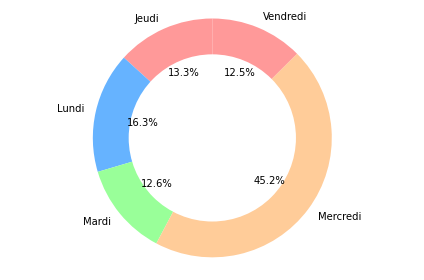

In [13]:
import matplotlib.pyplot as plt# Pie chart
labels = tot_jour1['jour']
sizes = tot_jour1['gaspillage_volume']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

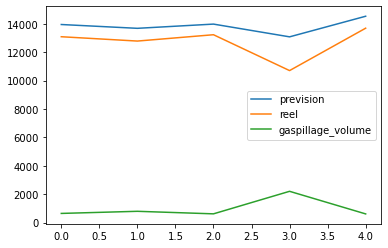

In [14]:
tot_jour1[['prevision', 'reel', 'gaspillage_volume', 'jour']].plot()
plt.show()

In [15]:
# Création d'un petit dataframe pour faire une observation de la représentation de repas servis dans la semaine

tot_jour = cantine['jour'].value_counts().to_frame().reset_index()
tot_jour.rename(columns=lambda x: x.replace('index', 'jour de la semaine'), inplace=True)
tot_jour.rename(columns=lambda x: x.replace('jour', 'total par jour'), inplace=True)
tot_jour

,total par jour de la semaine,total par jour
0,Vendredi,300
1,Mardi,299
2,Lundi,291
3,Jeudi,289
4,Mercredi,9


#### Nombre de service par jour de la semaine entre 2011 et 2019 

<BarContainer object of 5 artists>

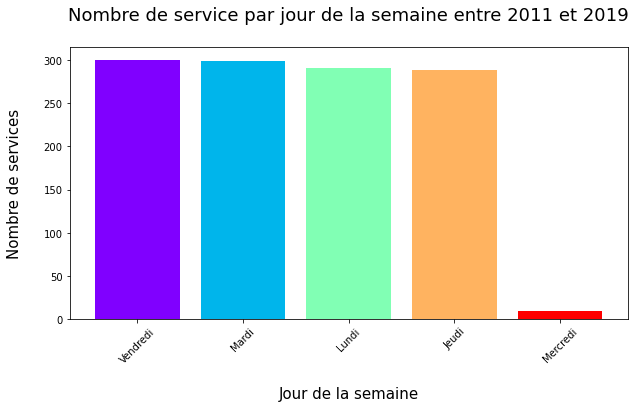

In [16]:
#plt.subplot(2,2,1)
plt.figure(figsize=(10, 5))

scores = tot_jour['total par jour de la semaine']
Total_scores = tot_jour['total par jour']

plt.xticks(rotation = '45')
plt.title("Nombre de service par jour de la semaine entre 2011 et 2019\n", fontsize=18)
plt.ylabel("Nombre de services\n", fontsize=15)
plt.xlabel("\nJour de la semaine", fontsize=15)
plt.bar(scores, Total_scores, color = cm.rainbow(np.linspace(0, 1, len(scores))))

Pourquoi si peu de service le mercredi ?

#### Mercredi

In [17]:
wednesday = cantine.loc[(cantine['jour'] == 'Mercredi')]
wednesday

,date,prevision,reel,effectif,nos,ind,greves_manquantes,menu,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,inc_grippe,inc_gastro,inc_varicelle,fete_musulmane,ramadan,fete_chretienne,fete_juive,jour,semaine,mois,gaspillage_volume,gaspillage_pourcentage,greves
74,2011-06-01,12041,9839,17373,0.0,0,0,"['ECOLE', 'crepes fromage', 'lieu', 'marmite d...",0,1,0,0,0,0,127,1015,57,0,0,0,0,Mercredi,22,Juin,2202,18.287518,0.0
203,2012-05-16,12554,10377,17955,1.0,0,0,"['scolaire', 'carottes râpées', 'chipolata/mer...",0,1,0,0,0,0,364,0,490,0,0,0,0,Mercredi,20,Mai,2177,17.341087,1.0
326,2013-04-03,13323,10743,17842,1.0,0,0,[],0,0,0,0,0,0,3611,2236,0,0,0,0,0,Mercredi,14,Avril,2580,19.365008,1.0
344,2013-05-22,12984,10699,17842,1.0,0,0,[],0,0,0,0,0,0,0,402,253,0,0,0,0,Mercredi,21,Mai,2285,17.598583,1.0
403,2013-11-13,0,0,18243,1.0,1,0,"['MERCREDI SCOLAIRE', 'menu greve']",0,0,0,0,0,0,0,1794,0,1,0,0,0,Mercredi,46,Novembre,0,NaN,2.0
478,2014-04-23,13672,11030,18243,0.0,0,0,"['MERCREDI AVEC CLASSE', 'Salade de pâtes agro...",0,0,0,0,0,0,0,2362,766,0,0,0,0,Mercredi,17,Avril,2642,19.324166,0.0
491,2014-05-28,13084,11177,18243,0.0,0,0,"['Ecoles', 'Choux blancs mimolette', 'Rôti de ...",0,1,0,0,0,0,127,1397,585,0,0,0,0,Mercredi,22,Mai,1907,14.575054,0.0
497,2014-06-11,13074,10409,18243,0.0,0,1,"['Ecole', 'salade au gruyère', 'Rôti de b\x9cu...",0,0,0,0,0,0,228,5028,1444,0,0,0,0,Mercredi,24,Juin,2665,20.383968,1.0
602,2015-05-13,14062,12035,18633,0.0,0,0,"['SCOLAIRE', 'Gaspacho/croûton', 'Poisson surg...",0,1,0,0,0,0,244,3232,922,0,0,0,0,Mercredi,20,Mai,2027,14.414735,0.0


On observe que dans la colonne menu il y écrit en plus *'école'*, *'scolaire'*, *'sorties scolaires'* on peut donc en déduire que les établissements ont dû faire des services en plus exceptionnellement à certaines dates.
De plus on observe qu'il n'y a qu'un ou trois services par an le mercredi. Il s'agit d'un évènement rare.
Pour la modélisation, il serait intéressant de ne pas prendre en compte les mercredis.

In [18]:
# Suppression des mercredi
cantine = cantine.loc[(cantine['jour'] != 'Mercredi')]

#### Représentation du nombre d'élèves, des prévisionnels et des repas servis entre 2011 et 2019  

In [36]:
# création df sur les effectifs
df_freq = cantine[['prevision', 'reel', 'effectif', 'date', 'jour', 'semaine', 'mois', 'ferie', 'greves','menu','gaspillage_volume']]
df_freq = df_freq.set_index('date')
df_freq

,prevision,reel,effectif,jour,semaine,mois,ferie,greves,menu,gaspillage_volume
date,,,,,,,,,,
2011-01-03,12289,11129,17373,Lundi,1,Janvier,0,1.0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",1160
2011-01-04,12558,11808,17373,Mardi,1,Janvier,0,0.0,"['Crêpe au fromage', 'emincé de volaille à la ...",750
2011-01-06,12753,11741,17373,Jeudi,1,Janvier,0,0.0,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1012
2011-01-07,12812,12322,17373,Vendredi,1,Janvier,0,0.0,"['Choux blancs mimolette', 'milanette en des',...",490
2011-01-10,12309,11302,17373,Lundi,2,Janvier,0,0.0,"['Endives / demi-\x9cuf', 'paella de la mer', ...",1007
...,...,...,...,...,...,...,...,...,...,...
2019-12-09,15991,10898,20685,Lundi,50,Decembre,0,1.0,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",5093
2019-12-10,15885,6442,20685,Mardi,50,Decembre,0,1.0,"['Choux rouges bio au gruyère', 'Sauté de porc...",9443
2019-12-13,17436,9168,20685,Vendredi,50,Decembre,0,2.0,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",8268


#### Représentation de l'effectif par années

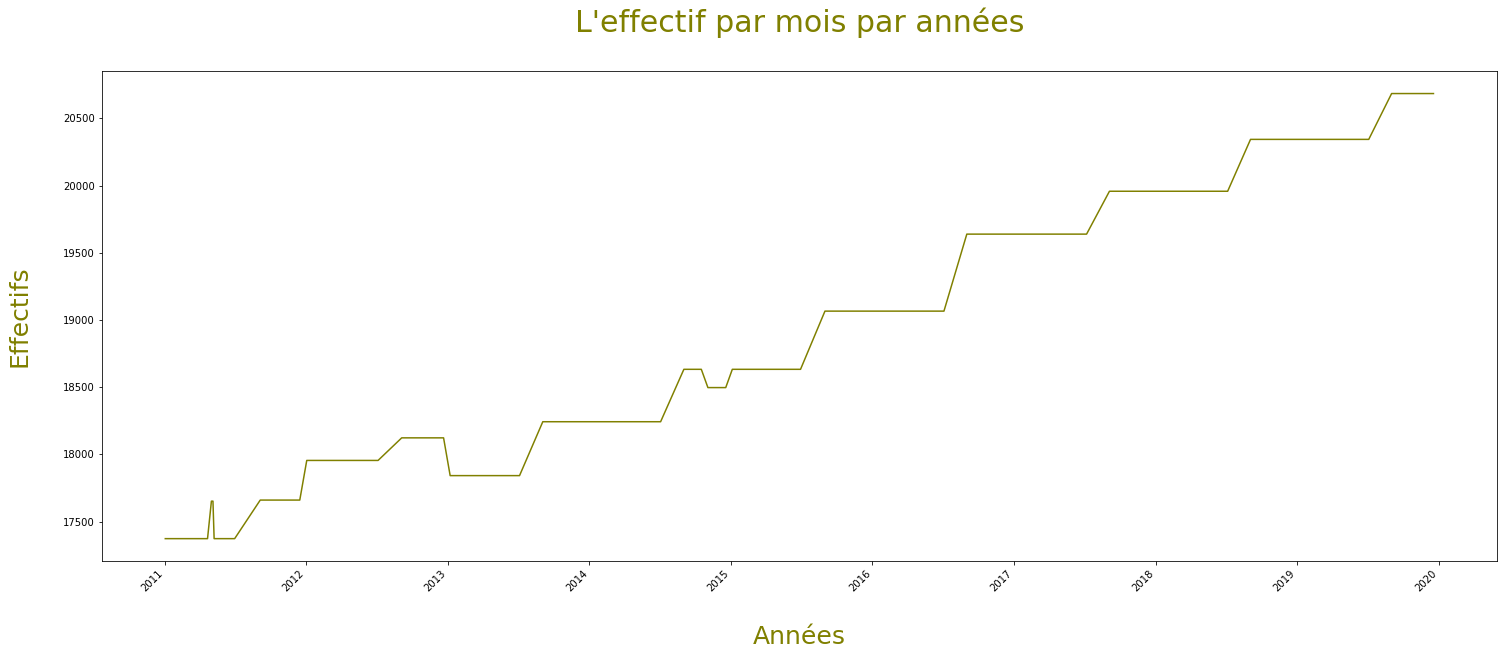

In [37]:
plt.figure(figsize = (25,10))
df_freq['effectif'].plot(color='olive')

plt.xticks(rotation = '45')
plt.title("L'effectif par mois par années\n", fontsize=30, color='olive')
plt.ylabel("Effectifs\n", fontsize=25, color='olive')
plt.xlabel("\nAnnées", fontsize=25, color='olive')
plt.show()

On se rend compte qu'il y a une évolution constante dans l'effectifs. Il y a une évolution stable dans les années scolaires à partir de 2015. 

In [27]:
# création d'un dataframe grèves à partir du csv data qui regroupe toutes les grèves
df_greves = greve[['date_de_debut', 'date_de_fin', 'Motif exprimé', 'Métiers ciblés par le préavis', 
                  'Population devant travailler ciblee par le préavis', 
                  'Nombre de grévistes du préavis', 'Taux de grévistes au sein de la population concernée par le préavis']]
df_greves = df_greves.set_index('date_de_debut')
df_greves.head(2)

,date_de_fin,Motif exprimé,Métiers ciblés par le préavis,Population devant travailler ciblee par le préavis,Nombre de grévistes du préavis,Taux de grévistes au sein de la population concernée par le préavis
date_de_debut,,,,,,
2003-02-10,2003-02-12,Journée d'action des agents du Matériel : moye...,agent de manoeuvre;logistique;ingénierie et ma...,3935.0,694.0,17.6
2003-05-12,NaT,Retraites.,conducteur;agent de manoeuvre;chef de bord;acc...,50410.0,11867.0,23.5


## Année 2011

In [40]:
df_greves11 = df_greves['2011']
df_greves['greves'] = df_freq['effectif']
df_greves11.dropna()

,date_de_fin,Motif exprimé,Métiers ciblés par le préavis,Population devant travailler ciblee par le préavis,Nombre de grévistes du préavis,Taux de grévistes au sein de la population concernée par le préavis,greves
date_de_debut,,,,,,,
2011-04-12,2011-04-13,Abandon du projet ORC et de la colocalisation ...,agent de manoeuvre;régulation et circulation f...,358.0,142.0,39.7,17373.0
2011-02-03,2011-02-04,"Retrait du projet Ulysse, avenir et déroulemen...",agent de manoeuvre,2137.0,24.0,1.1,17373.0
2011-10-10,2011-10-12,"Service public, unicité de l'entreprise, emplo...",conducteur;agent de manoeuvre;chef de bord;acc...,43390.0,9172.0,21.1,17660.0
2011-11-07,2011-11-09,Directive européenne de refonte du 1er paquet ...,conducteur;agent de manoeuvre;chef de bord;acc...,124789.0,16897.0,13.5,17660.0
2011-06-30,2011-07-01,"Arrêt de la co-entreprise SNCF/IBM , contrôle ...",agent de manoeuvre,2423.0,509.0,21.0,17373.0
2011-10-10,2011-10-12,"Avenir du service public , maintien du caractè...",conducteur;agent de manoeuvre;chef de bord;acc...,128991.0,27466.0,21.3,17660.0


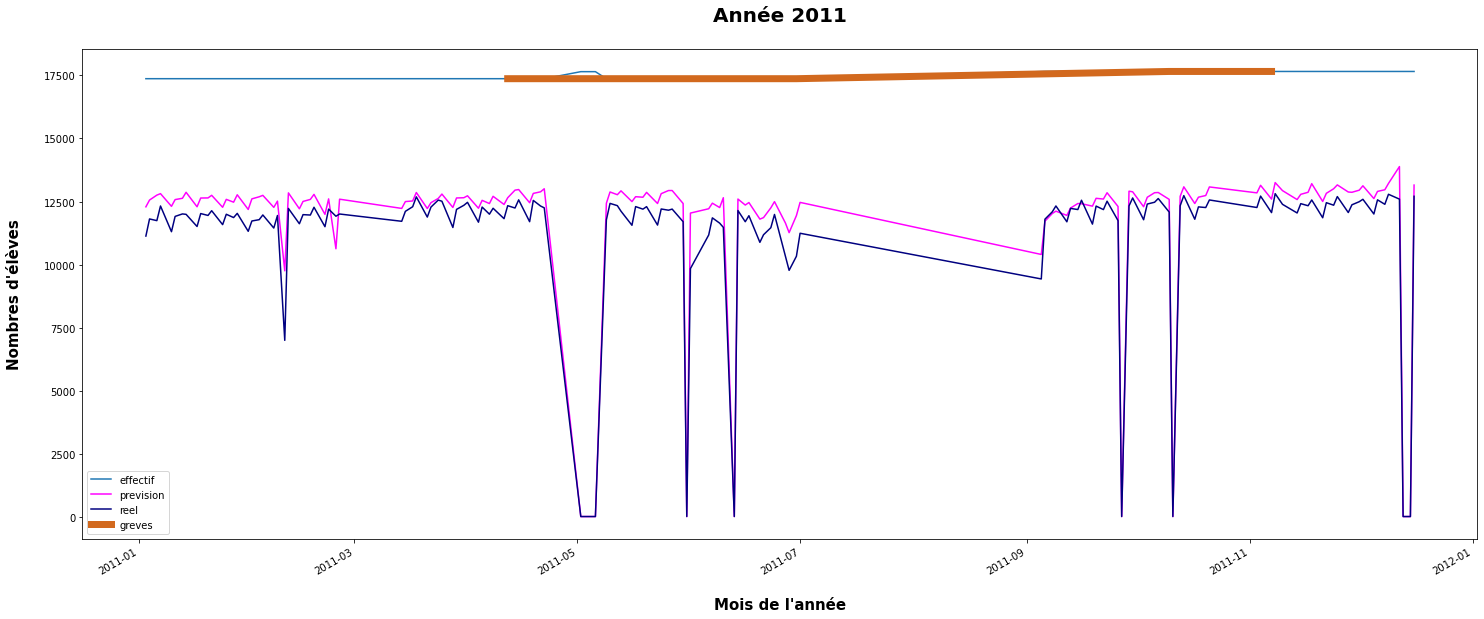

In [41]:
import seaborn as sns
# année 2011
plt.figure(figsize = (25,10))
df_freq['effectif']['2011'].plot(label='effectif')
df_freq['prevision']['2011'].plot(color='magenta')
df_freq['reel']['2011'].plot(color='navy')
df_greves11['greves'].plot(color='chocolate', lw=7)

plt.title("Année 2011\n", fontsize=20, weight='bold')
plt.xlabel("\nMois de l'année", fontsize=15, weight='bold')
plt.ylabel("Nombres d'élèves\n", fontsize=15, weight='bold')
plt.legend()
plt.show()

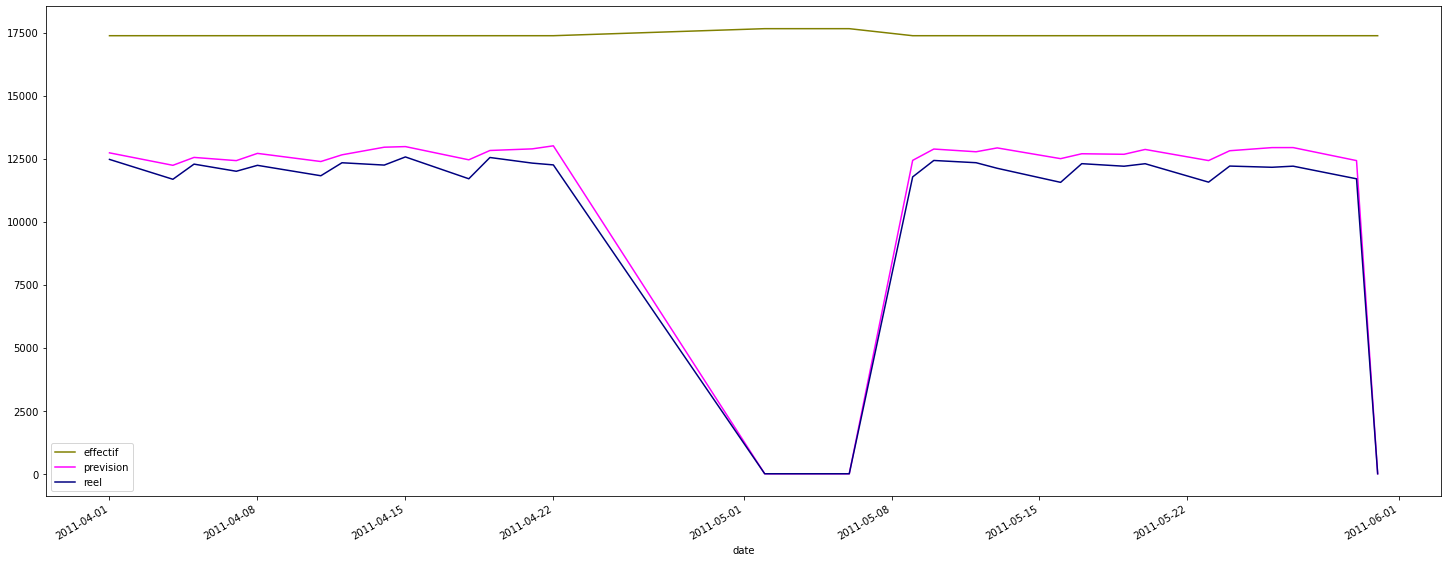

In [42]:
# année 2011 en mai
plt.figure(figsize = (25,10))
df_freq['effectif']['2011-04' : '2011-05'].plot(color='olive',label='effectif')
df_freq['prevision']['2011-04' : '2011-05'].plot(color='magenta')
df_freq['reel']['2011-04' : '2011-05'].plot(color='navy')
plt.legend()
plt.show()

On observe que du 02 eu 06 mai 2011, il n'y aucune données prévisionnelles et réelles, et qu'en regardant sur le mois d'avril on observe qu'il y a un trou dans les dates à partir du 22 avril 2011. 

Après quelques recherches, les vacances sont du 23 avril pour revenir à l'école le 9 mai 2011. 

In [43]:
# suppression des lignes où ils sont en vacances et donc aux dates : du 2011-05-01 au 2011-05-08 compris
cantine = cantine.drop([56, 57, 58, 59, 60])

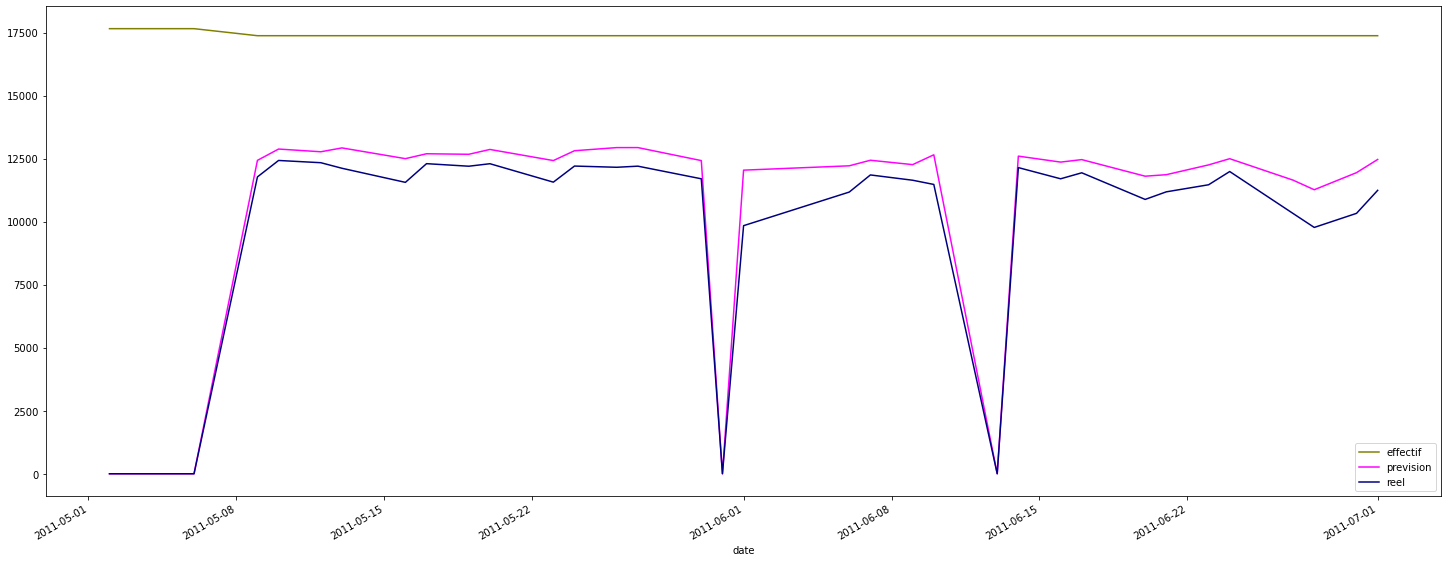

In [44]:
# année 2011 en juin
plt.figure(figsize = (25,10))
df_freq['effectif']['2011-05' : '2011-07'].plot(color='olive', label='effectif')
df_freq['prevision']['2011-05' : '2011-07'].plot(color='magenta')
df_freq['reel']['2011-05' : '2011-07'].plot(color='navy')
plt.legend()
plt.show()

On observe dans le graph ci-dessus une chute au 31 mai 2011, il s'agissait d'une grève contre la réforme des retraites (cf.: http://cgt-nantes.fr/IMG/pdf/0_31_mai_2011_communique_commun.pdf) et au 13 juin 2011 qui est un jour férié.

In [45]:
df_freq['2011-06-28':'2011-06-28']

,prevision,reel,effectif,jour,semaine,mois,ferie,greves,menu,gaspillage_volume
date,,,,,,,,,,
2011-06-28,11264,9769,17373,Mardi,26,Juin,0,0.0,"['Betteraves stock', 'Rôti de b\x9cuf foid', '...",1495


On observe une baisse de fréquentations à cette date.

## Année scolaire 2011 à 2012

In [46]:
df_greves1112 = df_greves['2011-09':'2012-07']
#df_greves12['greves'] = df_freq['effectif']
df_greves1112.dropna()

,date_de_fin,Motif exprimé,Métiers ciblés par le préavis,Population devant travailler ciblee par le préavis,Nombre de grévistes du préavis,Taux de grévistes au sein de la population concernée par le préavis,greves
date_de_debut,,,,,,,
2012-04-03,2012-04-05,"FRET : réouvertures de gares , retour au tri à...",conducteur;conducteur;agent de manoeuvre;accue...,8290.0,472.0,5.7,17955.0
2012-06-07,2012-06-08,"Moratoire sur restructurations, négociations s...",agent de manoeuvre;ingénierie et maintenance d...,31596.0,3093.0,9.8,17955.0
2011-10-10,2011-10-12,"Service public, unicité de l'entreprise, emplo...",conducteur;agent de manoeuvre;chef de bord;acc...,43390.0,9172.0,21.1,17660.0
2011-11-07,2011-11-09,Directive européenne de refonte du 1er paquet ...,conducteur;agent de manoeuvre;chef de bord;acc...,124789.0,16897.0,13.5,17660.0
2012-02-28,2012-03-01,Avenir du service public ferroviaire suite aux...,conducteur;agent de manoeuvre;chef de bord;acc...,121564.0,18689.0,15.4,17955.0
2012-02-28,2012-03-01,"Exercice de notation , Avenir des sites de Vil...",conducteur;conducteur;agent de manoeuvre;accue...,8054.0,1374.0,17.1,17955.0
2012-02-28,2012-03-01,"Effectifs, création d'une filiale Travaux à l'...",conducteur;agent de manoeuvre;chef de bord;acc...,121564.0,18689.0,15.4,17955.0
2012-07-03,2012-07-04,"Gel du déménagement de la DCF , Effectif, emba...",agent de manoeuvre;régulation et circulation f...,386.0,120.0,31.1,17955.0
2011-10-10,2011-10-12,"Avenir du service public , maintien du caractè...",conducteur;agent de manoeuvre;chef de bord;acc...,128991.0,27466.0,21.3,17660.0


In [47]:
# création d'un poid pour calculer les grèves
df_freq['greves'] = df_freq['greves'].apply(lambda x: x + 2)
df_freq

,prevision,reel,effectif,jour,semaine,mois,ferie,greves,menu,gaspillage_volume
date,,,,,,,,,,
2011-01-03,12289,11129,17373,Lundi,1,Janvier,0,3.0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",1160
2011-01-04,12558,11808,17373,Mardi,1,Janvier,0,2.0,"['Crêpe au fromage', 'emincé de volaille à la ...",750
2011-01-06,12753,11741,17373,Jeudi,1,Janvier,0,2.0,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1012
2011-01-07,12812,12322,17373,Vendredi,1,Janvier,0,2.0,"['Choux blancs mimolette', 'milanette en des',...",490
2011-01-10,12309,11302,17373,Lundi,2,Janvier,0,2.0,"['Endives / demi-\x9cuf', 'paella de la mer', ...",1007
...,...,...,...,...,...,...,...,...,...,...
2019-12-09,15991,10898,20685,Lundi,50,Decembre,0,3.0,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",5093
2019-12-10,15885,6442,20685,Mardi,50,Decembre,0,3.0,"['Choux rouges bio au gruyère', 'Sauté de porc...",9443
2019-12-13,17436,9168,20685,Vendredi,50,Decembre,0,4.0,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",8268


In [48]:
# création colonne impact grève pour voir s'il existe une corrélation entre les grèves et la présence à la cantine
df_freq['impact_greve'] = (df_freq['effectif'] // df_freq['greves']) 
df_freq

,prevision,reel,effectif,jour,semaine,mois,ferie,greves,menu,gaspillage_volume,impact_greve
date,,,,,,,,,,,
2011-01-03,12289,11129,17373,Lundi,1,Janvier,0,3.0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",1160,5791.0
2011-01-04,12558,11808,17373,Mardi,1,Janvier,0,2.0,"['Crêpe au fromage', 'emincé de volaille à la ...",750,8686.0
2011-01-06,12753,11741,17373,Jeudi,1,Janvier,0,2.0,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1012,8686.0
2011-01-07,12812,12322,17373,Vendredi,1,Janvier,0,2.0,"['Choux blancs mimolette', 'milanette en des',...",490,8686.0
2011-01-10,12309,11302,17373,Lundi,2,Janvier,0,2.0,"['Endives / demi-\x9cuf', 'paella de la mer', ...",1007,8686.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-09,15991,10898,20685,Lundi,50,Decembre,0,3.0,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",5093,6895.0
2019-12-10,15885,6442,20685,Mardi,50,Decembre,0,3.0,"['Choux rouges bio au gruyère', 'Sauté de porc...",9443,6895.0
2019-12-13,17436,9168,20685,Vendredi,50,Decembre,0,4.0,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",8268,5171.0


In [49]:
cantine = cantine.set_index('date')

#### merger la météo avec l'autre df

In [53]:
# merger la météo avec le df_freq
dffreq1 = pd.merge(df_freq, meteo, on='date')
#dffreq1 = dffreq1.drop(['level_0', 'index'], axis=1)
dffreq1.head()

,date,prevision,reel,effectif,jour,semaine,mois,ferie,greves,menu,gaspillage_volume,impact_greve,Température (°C),Humidité,Vitesse du vent moyen 10 mn,Nebulosité totale
0,2011-01-03,12289,11129,17373,Lundi,1,Janvier,0,3.0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",1160,5791.0,4.80,78.5,3.35,87.5
1,2011-01-04,12558,11808,17373,Mardi,1,Janvier,0,2.0,"['Crêpe au fromage', 'emincé de volaille à la ...",750,8686.0,14.45,84.0,4.35,82.5
2,2011-01-06,12753,11741,17373,Jeudi,1,Janvier,0,2.0,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1012,8686.0,15.90,54.5,3.35,25.0
3,2011-01-07,12812,12322,17373,Vendredi,1,Janvier,0,2.0,"['Choux blancs mimolette', 'milanette en des',...",490,8686.0,19.40,45.5,3.10,25.0
4,2011-01-10,12309,11302,17373,Lundi,2,Janvier,0,2.0,"['Endives / demi-\x9cuf', 'paella de la mer', ...",1007,8686.0,20.80,57.0,2.35,0.0


In [ ]:
food_dataset = pd.DataFrame(dffreq1['menu'].str.split(',',4).tolist(),
                                 columns = ['Entree','Plat','Accompagnement','Dessert1','Dessert2'])
food_dataset

 

dftesth = pd.concat([dffreq1, food_dataset], axis=1)
#dftesth = dftesth.drop(['level_0','index'], axis=1)
dftesth

In [ ]:
dffreq.head()

In [ ]:
# Année scolaire 2011 à 2012
plt.figure(figsize = (25,15))
df_freq['effectif']['2011-09':'2012-07'].plot(label='effectif')
df_freq['prevision']['2011-09':'2012-07'].plot(color='magenta')
df_freq['reel']['2011-09':'2012-07'].plot(color='navy')
df_greves1112['greves'].plot(color='chocolate', lw=7, ls=':')
df_freq['impact_greve']['2011-09':'2012-07'].plot(color='chocolate', ls='--')
cantine['gaspillage_volume']['2011-09':'2012-07'].plot(color='black')

plt.title("Année scolaire 2011 à 2012\n", fontsize=18, weight='bold')
plt.xlabel("\nAnnée scolaire", fontsize=15, weight='bold')
plt.ylabel("Nombres d'élèves\n", fontsize=15, weight='bold')
plt.legend()
plt.show()

On observe 4 grosses de fréquentations au niveau des données sur les prévisions et les repas servis en septembre, en octobre, en décembre et en janvier.

Pour ces 4 chutes cela est dû à des grèves, il y a eu un mouvement de grève les 27 septembre 2011, 11 octobre 2011, 13 et du 15 décembre 2011 et 31 janvier 2012.

On observe également qu'en septembre, il y a eu des erreurs au niveau du prévisionnels.

#### *Erreurs de prévisionnel* :

In [ ]:
df_freq['2011-09-06':'2011-09-09']

In [ ]:
df_freq['2011-09-16':'2011-09-16']

## Année scolaire 2012 à 2013

In [ ]:
df_greves1213 = df_greves['2012-09':'2013-07']
#df_greves12['greves'] = df_freq['effectif']
df_greves1213.dropna()

In [ ]:
# Année scolaire 2012 à 2013
plt.figure(figsize = (25,10))
df_freq['effectif']['2012-09':'2013-07'].plot(label='effectif')
df_freq['prevision']['2012-09':'2013-07'].plot(color='magenta')
df_freq['reel']['2012-09':'2013-07'].plot(color='navy')
df_greves1213['greves'].plot(color='chocolate', lw=7, ls=':')
df_freq['impact_greve']['2012-09':'2013-07'].plot(color='chocolate', ls='--')
cantine['gaspillage_volume']['2012-09':'2013-07'].plot(color='black')


plt.title("Année scolaire 2012 à 2013\n", fontsize=18, weight='bold')
plt.xlabel('\nAnnée scolaire', fontsize=15, weight='bold')
plt.ylabel("Nombres d'élèves\n", fontsize=15, weight='bold')
plt.legend()
plt.show()

On observe 2 chutes de données dans le prévisionnel et les repas servis en janvier et en février qui correspondent à des grèves. Il y a aussi une chute de repas servis en mars qui correspondent à des grèves. 

Dans les autres grèves nous avons observés qu'il n'y avait pas de données dans les prévisionnels et dans les repas servis contrairement à ici où nous avons des données et nous pouvons observer dans le dataframe ci-dessous que dans la colonne 'greves' on observe qu'il y a deux mouvements de grèves ('nos', 'ind' et 'greves_manquantes'), on peut émettre l'hypothèse que plus il y a de mouvements de grèves, moins il y a de présences à la cantine.

In [ ]:
df_freq['2013-03-26':'2013-03-29']

Ces grèves correspondent à un mouvement de grève de l'éducation nationale (cf.:https://www.education.gouv.fr/mouvement-national-de-greve-l-education-nationale-du-jeudi-28-mars-2013-10829). 

## Année scolaire 2013 à 2014

In [ ]:
df_greves1314 = df_greves['2013-09':'2014-07']
#df_greves12['greves'] = df_freq['effectif']
df_greves1314.dropna()

In [ ]:
# Année scolaire 2013 à 2014
plt.figure(figsize = (25,10))
df_freq['effectif']['2013-09':'2014-07'].plot(label='effectif')
df_freq['prevision']['2013-09':'2014-07'].plot(color='magenta')
df_freq['reel']['2013-09':'2014-07'].plot(color='navy')
df_greves1314['greves'].plot(color='chocolate', lw=7, ls=':')
df_freq['impact_greve']['2013-09':'2014-07'].plot(color='chocolate', ls='--')
cantine['gaspillage_volume']['2013-09':'2014-07'].plot(color='black')


plt.title("Année scolaire 2013 à 2014\n", fontsize=18, weight='bold')
plt.xlabel("\nAnnée scolaire", fontsize=15, weight='bold')
plt.ylabel("Nombres d'élèves\n", fontsize=15, weight='bold')
plt.legend()
plt.show()

Dans cette année scolaire, on observe 9 chutes dans les prévisions et les repas servis ce qui, comparé aux années précédentes est plus conséquent. 
Le 10 septembre 2013, cela correspond à un mouvement de grève.
Du 10 au 18 octobre et du 14 au 19 novembre 2013, il y a eu deux grands mouvements de grève dans l'éducation nationale.
Le 26 novembre 2016, il y a eu une grève sur la réforme des retraites.
Les 5 et 6 décembre 2013, il y a eu une grève contre la réforme scolaire.
Les 06 et 24 février, le 18 mars et le 15 mai 2013, les enseignants étaient en grèves.

## Année scolaire 2014 à 2015

In [ ]:
df_greves1415 = df_greves['2014-09':'2015-07']
#df_greves12['greves'] = df_freq['effectif']
df_greves1415.dropna()

In [ ]:
# Année scolaire 2014 à 2015
plt.figure(figsize = (25,10))
df_freq['effectif']['2014-09':'2015-07'].plot(label='effectif')
df_freq['prevision']['2014-09':'2015-07'].plot(color='magenta')
df_freq['reel']['2014-09':'2015-07'].plot(color='navy')
df_greves1415['greves'].plot(color='chocolate', lw=7, ls=':')
df_freq['impact_greve']['2014-09':'2015-07'].plot(color='chocolate', ls='--')
cantine['gaspillage_volume']['2014-09':'2015-07'].plot(color='black')


plt.title("Année scolaire 2014 à 2015\n", fontsize=18, weight='bold')
plt.xlabel("\nAnnée scolaire", fontsize=15, weight='bold')
plt.ylabel("Nombres d'élèves\n", fontsize=15, weight='bold')
plt.legend()
plt.show()

Dans les prévisionnels et les repas servis on observe que le graphiques est en dent de scie.
On observe sur le graphique qu'il y a eu une erreur au niveau des prévisions par rapport aux repas servis comme on peut le voir dans le tableau ci-dessous.

In [ ]:
df_freq['2015-01-22':'2015-01-22']

In [ ]:
df_freq['2015-02-27':'2015-04-02']

Dans ce tableau, on observe qu'il manque les données sur le mois de mars 2015. 

## Année scolaire du 2015 à 2016

In [ ]:
df_greves1516 = df_greves['2015-09':'2016-07']
#df_greves12['greves'] = df_freq['effectif']
df_greves1516.dropna()

In [ ]:
# Année scolaire 2015 à 2016
plt.figure(figsize = (25,10))
df_freq['effectif']['2015-09':'2016-07'].plot(label='effectif')
df_freq['prevision']['2015-09':'2016-07'].plot(color='magenta')
df_freq['reel']['2015-09':'2016-07'].plot(color='navy')
df_greves1516['greves'].plot(color='chocolate', lw=7, ls=':')
df_freq['impact_greve']['2015-09':'2016-07'].plot(color='chocolate', ls='--')
cantine['gaspillage_volume']['2015-09':'2016-07'].plot(color='black')

plt.title('Année scolaire 2015 à 2016\n', fontsize=20, weight='bold')
plt.xlabel('\nAnnée scolaire', fontsize=15, weight='bold')
plt.ylabel("Nombre d'élèves\n", fontsize=15, weight='bold')
plt.legend()
plt.show()

On observe qu'il y a eu des erreurs de prévisionels en septembre et en octobre. On constate également une chute dans les prévisionnels où ils ont prévus moins de repas, pour les repas servis le 02 juin et le 04 juillet 2016.

#### *Erreurs de prévisionnels* :

#### *En septembre* :

In [ ]:
df_freq['2015-09-15':'2015-09-15'] 

Ici, qui est dû à une hausse de la fréquentation de la cantine.

In [ ]:
df_freq['2015-09-28':'2015-09-29']

Ici, dû à une baisse dans les prévisions.

#### *En octobre* :

In [ ]:
df_freq['2015-10-01':'2015-10-02']

Ici, dû à une baisse dans les prévisions.

#### *Baisse de fréquentation* :

In [ ]:
df_freq['2016-06-02':'2016-06-02']

## Année scolaire du 2016 à 2017

In [ ]:
df_greves1617 = df_greves['2016-09':'2017-07']
#df_greves12['greves'] = df_freq['effectif']
df_greves1617.dropna()

In [ ]:
# Année scolaire 2016 à 2017
plt.figure(figsize = (25,10))
df_freq['effectif']['2016-09':'2017-07'].plot(label='effectif')
df_freq['prevision']['2016-09':'2017-07'].plot(color='magenta')
df_freq['reel']['2016-09':'2017-07'].plot(color='navy')
df_greves1617['greves'].plot(color='chocolate', lw=7, ls=':')
df_freq['impact_greve']['2016-09':'2017-07'].plot(color='chocolate', ls='--')
cantine['gaspillage_volume']['2016-09':'2017-07'].plot(color='black')


plt.title("Année scolaire 2016 à 2017\n", fontsize=18, weight='bold')
plt.xlabel("\nAnnée scolaire", fontsize=15, weight='bold')
plt.ylabel("Nombres d'élèves\n", fontsize=15, weight='bold')
plt.legend()
plt.show()

On observe qu'en septembre 2016, il y a eu une hausse de repas servis le 09 septembre 2016 et une baisse de prévisionnels le 22 septembre.

## Année scolaire du 2017 à 2018

In [ ]:
df_greves1718 = df_greves['2017-09':'2018-07']
#df_greves12['greves'] = df_freq['effectif']
df_greves1718.dropna()

In [ ]:
# Année scolaire 2017 à 2018
plt.figure(figsize = (25,10))
df_freq['effectif']['2017-09':'2018-07'].plot(label='effectif')
df_freq['prevision']['2017-09':'2018-07'].plot(color='magenta')
df_freq['reel']['2017-09':'2018-07'].plot(color='navy')
df_greves1718['greves'].plot(color='chocolate', lw=7, ls=':')
df_freq['impact_greve']['2017-09':'2018-07'].plot(color='chocolate', ls='--')
cantine['gaspillage_volume']['2017-09':'2018-07'].plot(color='black')


plt.title("Année scolaire 2017 à 2018\n", fontsize=18, weight='bold')
plt.xlabel("\nAnnée scolaire", fontsize=15, weight='bold')
plt.ylabel("Nombres d'élèves\n", fontsize=15, weight='bold')
plt.legend()
plt.show()

On observe deux chutes au niveau des repas servis contrairement aux prévisionnels en septembre et une petite en juin. 

#### *Chutes* :

In [ ]:
df_freq['2017-09-12':'2017-09-12']

In [ ]:
df_freq['2017-09-21':'2017-09-21']

In [ ]:
df_freq['2018-06-28':'2018-06-28']

Ces trois chutes correspondent à des "menu dépannage".

#### *Baisse de fréquentation de la cantine* :

In [ ]:
df_freq['2018-02-13':'2018-02-16']

In [ ]:
df_freq['2018-04-06':'2018-04-06']

Sur ces dates là, on observe une baisse de fréquentation de la cantine, mais qu'ils avaient prévus plus dans le prévisionnel.

## Année scolaire 2018 à 2019

In [ ]:
df_greves1819 = df_greves['2018-09':'2019-07']
#df_greves12['greves'] = df_freq['effectif']
df_greves1819.dropna()

In [ ]:
# Année scolaire 2018 à 2019
plt.figure(figsize = (25,10))
df_freq['effectif']['2018-09':'2019-07'].plot(label='effectif')
df_freq['prevision']['2018-09':'2019-07'].plot(color='magenta')
df_freq['reel']['2018-09':'2019-07'].plot(color='navy')
df_greves1819['greves'].plot(color='chocolate', lw=7, ls=':')
df_freq['impact_greve']['2018-09':'2019-07'].plot(color='chocolate', ls='--')
cantine['gaspillage_volume']['2018-09':'2019-07'].plot(color='black')


plt.title("Année scolaire 2018 à 2019\n", fontsize=18, weight='bold')
plt.xlabel("\nAnnée scolaire", fontsize=15, weight='bold')
plt.ylabel("Nombres d'élèves\n", fontsize=15, weight='bold')
plt.legend()
plt.show()

On observe sur le graphique une baisse de la fréquentation en janvier, février, mars, avril, juin et juillet.

#### *Erreurs de prévisionnels* :

In [ ]:
df_freq['2018-09-27':'2018-09-27']

#### *Baisse de fréquentation* :

In [ ]:
df_freq['2019-01-08':'2019-01-24']

## Année scolaire 2019 à 2020

In [ ]:
df_greves1920 = df_greves['2019-09':'2020-07']
#df_greves12['greves'] = df_freq['effectif']
df_greves1920.dropna()

In [ ]:
# Année scolaire 2019 à 2020
plt.figure(figsize = (25,10))
df_freq['effectif']['2019-09':'2020-07'].plot(label='effectif')
df_freq['prevision']['2019-09':'2020-07'].plot(color='magenta')
df_freq['reel']['2019-09':'2020-07'].plot(color='navy')
df_greves1920['greves'].plot(color='chocolate', lw=7, ls=':')
df_freq['impact_greve']['2019-09':'2020-07'].plot(color='chocolate', ls='--')
cantine['gaspillage_volume']['2019-09':'2020-07'].plot(color='black')


plt.title("Année scolaire 2019 à 2020\n", fontsize=18, weight='bold')
plt.xlabel("\nAnnée scolaire", fontsize=15, weight='bold')
plt.ylabel("Nombres d'élèves\n", fontsize=15, weight='bold')
plt.legend()
plt.show()

In [ ]:
septembre = df_freq['2019'].loc[(df_freq['mois'] == 'Janvier')]
septembre.head(60)

In [ ]:
df_greves['2014-05']

In [ ]:
# année 2014
plt.figure(figsize = (25,10))
df_freq['effectif']['2014'].resample('Y').plot()
plt.show()

In [ ]:
df_freq['2013-10-10':'2013-10-18']

# Après c'est quelques idées qui sont encore à travailler: 

In [ ]:
# Années scolaires en réel

fig, ax = plt.subplots(2, figsize = (25, 10), sharex = True) 
ax[0].plot(df_freq['reel']['2011-09':'2012-07'].plot(color='navy', label='2011-2012'))
ax[1].plot(df_freq['reel']['2012-09':'2013-07'].plot(color='magenta'))
ax[2].plot(df_freq['reel']['2013-09':'2014-07'].plot(color='olive'))
ax[3].plot(df_freq['reel']['2014-09':'2015-07'].plot(color='skyblue'))
ax[4].plot(df_freq['reel']['2015-09':'2016-07'].plot(color='black'))
ax[5].plot(df_freq['reel']['2016-09':'2017-07'].plot(color='gold'))
ax[6].plot(df_freq['reel']['2017-09':'2018-07'].plot(color='lime'))
ax[7].plot(df_freq['reel']['2018-09':'2019-07'].plot(color='orange'))
ax[8].plot(df_freq['reel']['2019-09':'2020-07'].plot(color='chocolate'))

plt.legend()
plt.show()

#### Représentation de l'effectif total avec les prévisions et la réalité des repas consommées

In [ ]:
plt.figure(figsize = (25, 10))

df_freq['effectif'].plot(label = 'effectif', color= 'midnightblue')
df_freq['prevision'].plot(label= 'prevision', color = 'darkred')
df_freq['reel'].plot(label='réel', color='darkgreen')

plt.title("Représentation de l'effectif total avec les prévisions et la réalité des repas consommées\n", fontsize=18)
plt.ylabel("Nombre de repas\n", fontsize = 15)
plt.xlabel("\nDates", fontsize = 15)
plt.legend()
plt.show()

#### Représentation des écoles par rapport aux prévisions et à la réalité des repas consommés

In [ ]:
food_dataset = pd.DataFrame(df_freq['menu'].str.split(',',4).tolist(),
                                 columns = ['Entree','Plat','Accompagnement','Dessert1','Dessert2'])
food_dataset

In [ ]:
food_dataset = pd.DataFrame(df_freq['menu'].str.split(',',4).tolist(),
                                 columns = ['Entree','Plat','Accompagnement','Dessert1','Dessert2'])
food_dataset

dftesth = pd.concat([df_freq, food_dataset], axis=1)
dftesth = dftesth.drop(['level_0','index'], axis=1)
dftesth

In [ ]:
school.info()

In [ ]:
school.head(2)

In [ ]:
school.effectif.hist()

In [ ]:
df_effectifannée = school[['effectif','stamp']]
df_effectifannée = df_effectifannée.set_index('stamp')
df_effectifannée

In [ ]:
df_effectifannée.hist()

In [ ]:
cantine.head()

In [ ]:
# création pour le gaspillage en volume par jour de la semaine
totgaspi = cantine[['jour','gaspillage_volume']]
totgaspi

In [ ]:
# création d'un df sur la somme du gaspillage en volume pour le lundi
lundi = totgaspi.loc[(totgaspi['jour'] == "Lundi")].apply([sum])
lundi.rename(columns=lambda x: x.replace('gaspillage_volume', 'Lundi'), inplace=True)
lundi = lundi.reset_index()
lundi = lundi.drop(['jour', 'index'], axis=1)
lundi = lundi.reset_index()
lundi

In [ ]:
# création d'un df sur la somme du gaspillage en volume pour le mardi
mardi = totgaspi.loc[(totgaspi['jour'] == "Mardi")].apply([sum])
mardi.rename(columns=lambda x: x.replace('gaspillage_volume', 'Mardi'), inplace=True)
mardi = mardi.reset_index()
mardi = mardi.drop(['jour', 'index'], axis=1)
mardi = mardi.reset_index()
mardi 

In [ ]:
# création d'un df sur la somme du gaspillage en volume pour le mercredi
mercredi = totgaspi.loc[(totgaspi['jour'] == "Mercredi")].apply([sum])
mercredi.rename(columns=lambda x: x.replace('gaspillage_volume', 'Mercredi'), inplace=True)
mercredi = mercredi.reset_index()
mercredi = mercredi.drop(['jour', 'index'], axis=1)
mercredi = mercredi.reset_index()
mercredi 

In [ ]:
# création d'un df sur la somme du gaspillage en volume pour le jeudi
jeudi = totgaspi.loc[(totgaspi['jour'] == "Jeudi")].apply([sum])
jeudi.rename(columns=lambda x: x.replace('gaspillage_volume', 'Jeudi'), inplace=True)
jeudi = jeudi.reset_index()
jeudi = jeudi.drop(['jour', 'index'], axis=1)
jeudi = jeudi.reset_index()
jeudi 

In [ ]:
# création d'un df sur la somme du gaspillage en volume pour le vendredi
vendredi = totgaspi.loc[(totgaspi['jour'] == "Vendredi")].apply([sum])
vendredi.rename(columns=lambda x: x.replace('gaspillage_volume', 'Vendredi'), inplace=True)
vendredi = vendredi.reset_index()
vendredi = vendredi.drop(['jour', 'index'], axis=1)
vendredi = vendredi.reset_index()
vendredi 

In [ ]:
dfs = [lundi, mardi, mercredi, jeudi, vendredi]
dfs

In [ ]:
#importer la fonction reduce
from functools import reduce

In [ ]:
df = reduce(lambda left, right: pd.merge(left, right, on='index'), dfs)
df.columns = ['index', 'Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi']
df.set_index('index', inplace=True)
df

In [ ]:
plt.figure(figsize = (25, 10))

df_freq['effectif'].plot(label = 'effectif', color= 'midnightblue')
df_freq['prevision'].plot(label= 'prevision', color = 'darkred')
df_freq['reel'].plot(label='réel', color='darkgreen')

plt.title("Représentation de l'effectif total avec les prévisions et la réalité des repas consommées\n", fontsize=18)
plt.ylabel("Nombre de repas\n", fontsize = 15)
plt.xlabel("\nDates", fontsize = 15)
plt.legend()
plt.show()

In [ ]:
# création dataframe 
dftab = school[['effectif', 'site_nom','stamp']]
dftab['stamp'] = pd.to_datetime(dftab['stamp'])
dftab['years'] = dftab['stamp'].dt.year
dftab = dftab.astype({"years":str})
dftab.head(1)

#### effectifs par écoles pour l'année 2011

In [ ]:
dftab11 = dftab[dftab.years == '2011']
dftab11

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,18))

ax = sns.barplot(x="effectif", y="site_nom", data=dftab11)
ax.set_title("effectifs par écoles pour l'année 2011\n", fontsize=18)
plt.ylabel("Noms des écoles\n", fontsize=15)
plt.xlabel("Effectifs ", fontsize=15)